# Data preprocessing

In [3]:
# Import packages
import pandas as pd
from datetime import datetime
from datetime import date
import xlrd
import numpy as np
import re
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/luzemok/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/luzemok/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

CONTRACTION_MAP = dict((k.lower(),v.lower()) for k,v in CONTRACTION_MAP.items())

In [19]:
import pdfplumber
import re

def generate_call_content(file_path):
    pdf = pdfplumber.open(file_path)

    text_list = []
    for page in pdf.pages:
        cropped = page.crop((0.12*page.width, 0.08*page.height, 0.9*page.width, 0.9*page.height))
        text = cropped.extract_text().split('\n')
        for line in text:
            if line.startswith('This transcript may not be 100 percent accurate'):
                disclaimer = line
                index = text.index(disclaimer)
                text = text[:index]
            else:
                text = text

        text_list.extend(text)

    call_content = ' '.join(text_list)
    pdf.close()
    
    return call_content



In [ ]:
file_path = ['/Users/luzemok/Desktop/Data_Bloomberg/AstraZeneca/20220419_AstraZeneca_PLC-_2018-5-18_SD000000002874132112.pdf',
            '/Users/luzemok/Desktop/Data_Bloomberg/Ashtead Group/20220419_Ashtead_Group_PLC-_2017-9-12_SD000000002865840988.pdf',
            '/Users/luzemok/Desktop/Data_Bloomberg/Barclays/SD000000002872194039.pdf',
            '/Users/luzemok/Desktop/Data_Bloomberg/BP/20220419_BP_PLC-_2018-5-1_SD000000002872768301.pdf',
            '/Users/luzemok/Desktop/Data_Bloomberg/BTA/BT Group PLC Earnings Call 2017728 SD000000002903981916.pdf',
            '/Users/luzemok/Desktop/Data_Bloomberg/Dutch Shell/20220419_Shell_PLC-_2018-4-26_SD000000002872194459.pdf',
            '/Users/luzemok/Desktop/Data_Bloomberg/GSK/GlaxoSmithKline PLC Earnings Call 2018425 SD000000002905307487.pdf',
            '/Users/luzemok/Desktop/Data_Bloomberg/HSBC/HSBC Holdings PLC Earnings Call 201854 DN000000002424936894.pdf',
            '/Users/luzemok/Desktop/Data_Bloomberg/IAG/20220419_INTL_CONS_AIRLIN-_2018-5-4_SD000000002872781361.pdf',
            '/Users/luzemok/Desktop/Data_Bloomberg/IMB/Imperial Brands PLC Earnings Call 201859 SD000000002905331812.pdf',
            '/Users/luzemok/Desktop/Data_Bloomberg/Lloyds/20220419_LLOYDS_BANKING-_2018-4-25_SD000000002902660182.pdf',
            '/Users/luzemok/Desktop/Data_Bloomberg/Natwest/NatWest Group PLC Guidance Call 2018427 SD000000002905311087.pdf',
            '/Users/luzemok/Desktop/Data_Bloomberg/RRS/RANDGOLD RES LTD Earnings Call 2018510 SD000000002874123247.pdf',
            '/Users/luzemok/Desktop/Data_Bloomberg/SKY(till2018)/20220419_Sky_Ltd-_2017-10-12_SD000000002866592237.pdf',
            '/Users/luzemok/Desktop/Data_Bloomberg/SHP/Shire.pdf',
            '/Users/luzemok/Desktop/Data_Bloomberg/SN/SN.pdf',
            '/Users/luzemok/Desktop/Data_Bloomberg/TUI/TUI AG Earnings Call 2018213 DN000000002398709321.pdf',
            '/Users/luzemok/Desktop/Data_Bloomberg/ENDEAVOUR MINING Earnings Call 2018515 SD000000002874126402.pdf']

data = generate_call_content(file_path[0])
data1 = generate_call_content(file_path[1])
data2 = generate_call_content(file_path[2])
data3 = generate_call_content(file_path[3])
data4 = generate_call_content(file_path[4])
data5 = generate_call_content(file_path[5])
data6 = generate_call_content(file_path[6])
data7 = generate_call_content(file_path[7])
data8 = generate_call_content(file_path[8])
data9 = generate_call_content(file_path[9])
data10 = generate_call_content(file_path[10])
data11 = generate_call_content(file_path[11])
data12 = generate_call_content(file_path[12])
data13 = generate_call_content(file_path[13])
data14 = generate_call_content(file_path[14])
data15 = generate_call_content(file_path[15])
data16 = generate_call_content(file_path[16])
data17 = generate_call_content(file_path[17])

In [9]:
from collections import defaultdict
import itertools
import pandas as pd
pd.set_option('display.max_colwidth', 400)

def simple_clean(data):
    data = data.replace('$', '')
    data = re.sub('\s(A|Q)\s\-','', data)
    return data

def remove_punctuation(text):
    text = text.lower().strip().split(' ')
    text = [word[:-1] if word.endswith(',') or word.endswith('.') else word for word in text]
    text = [CONTRACTION_MAP[word].split(' ') if word in CONTRACTION_MAP.keys() else word for word in text]

    new_text = []
    for item in text:
        if isinstance(item, list):
            new_text.extend(item)
        else:
            new_text.append(item)
    return ' '.join(new_text)


def get_speaker_content(data):
    data = simple_clean(data)
    management = re.findall('(?<=Company\sParticipants)(.*)(?=Other\sParticipants)', data)[0]
    speakers = re.findall("((\w+\s\w+|\w+)\s\{\w+\s\d+\s<\w+>\})", data)
    iterator = re.finditer("((\w+\s\w+|\w+)\s\{\w+\s\d+\s<\w+>\})", data)
    indices = [m.start(0) for m in iterator]
    
    info = defaultdict(list)

    for i in range(len(indices)):

        if i != len(indices)-1:
            content = data[indices[i]:indices[i+1]]
            speaker_bio = re.findall("((\w+\s\w+|\w+)\s\{\w+\s\d+\s<\w+>\})", content)[0]
            content = content[len(speaker_bio[0]):]
            speaker = speaker_bio[1]
            if management.find(speaker) != -1:
                position = 'management'
            else:
                position = 'analyst'
        else:
            content = data[indices[i]:]
            speaker_bio = re.findall("((\w+\s\w+|\w+)\s\{\w+\s\d+\s<\w+>\})", content)[0]
            content = content[len(speaker_bio[0]):]
            speaker = speaker_bio[1]
            if management.find(speaker) != -1:
                position = 'management'
            else:
                position = 'analyst'
        info['speaker'].append(speaker)
        info['position'].append(position)
        info['content'].append(content)
    
    df = pd.DataFrame(info)
    df['content'] = df['content'].apply(remove_punctuation)

    return df

In [36]:
df = get_speaker_content(data)
df

,speaker,position,content
0,Pascal Soriot,management,hello everyone it is pascal soriot here ceo of astrazeneca welcome to our first quarter results conference call and webcast for investors and analysts we are here in london on a very beautiful day for the annual general meeting this afternoon we have people on the phone and on the webcast the presentation is available to you on astrazeneca.com as always for you to download please turn to slide...
1,David Fredrickson,management,great thank you so much pascal and i am really pleased here to be here to update all of you on the performance of our new generation of medicines i will start ﬁrst with oncology and then i will hand it over to mark mallon for a summary of cvrm respiratory and emerging markets if we could turn please to page 12 we are really pleased to announce that total oncology grew by 33% quarter-over-quart...
2,Mark Mallon,management,thanks dave now moving to new cvrm which as pascal mentioned is deﬁned as our medicines in cardiovascular renal and metabolic diseases sales were up by 8% despite the intense competition with first quarter sales at 900 million farxiga and brilinta continued to remain strong with double-digit growth across all regions brilinta sales of 293 million with 24% growth driven by the u.s at 32% and em...
3,Marc Dunoyer,management,thank you mark and hello everyone i am going to spend the next few minutes taking you through our ﬁnancial performance in the first quarter of the year as well as our unchanged guidance please turn to slide 22 as usual i will begin with the reported p&l before turning to the core numbers as pascal mentioned earlier product sales declined by 2% impacted by the reduced sales of crestor in europe...
4,Sean Bohen,management,thank you marc i would now like to run through the late-stage pipeline events since the last results announcement and the highlights of recent data presentations at medical meetings and as usual i will ﬁnish with a look at our upcoming news ﬂow please turn to slide 28 we delivered more good progress in the quarter in oncology lynparza received eu approval for a broad second-line ovarian cancer...
5,Pascal Soriot,management,thank you sean please turn to slide 33 now let me summarize before we end we are really pleased with the ongoing launches and the performance of our newer medicines during the first quarter as they underpin the guidance of growth in product sales in 2018 our ﬁnancials are on track with our performance being weighted towards the second half of the year and with product sales leading the way tot...
6,Pascal Soriot,management,so we have a question here from simon baker at exane simon go ahead simon p
7,Baker,analyst,one for sean please if i may we can see from the press release this morning the expanding and evolving parp io combination trials that you are conducting but i was just wondering how much further there is to expand that i am thinking areas like colorectal where there is been some interesting work published this year on the potential applicability of parp in that indication and also therefore p...
8,Sean Bohen,management,okay so let me -- sort of 2 questions there one is the expansion of i am going to call lynparza io so lynparza imﬁnzi or imﬁnzi plus treme so when we shared our ovarian cancer data we also shared that we have -- we are initiating a trial called duo-o which is looking at that combination speciﬁcally in ovarian cancer then we are looking at other data sets to see where we might expand beyond tha...
9,Pascal Soriot,management,thank you sean there is a question on the webcast that we will read aloud from vincent meunier at morgan stanley so he is trying to understand the potential of tagrisso initiative that were before you and the question is are there countries where the prevalence of the egfr mutations is higher than other countries? what about japan? and also in china what is the breakdown of volumes sales that ...


In [55]:
df1 = get_speaker_content(data1)
df2 = get_speaker_content(data2)
df3 = get_speaker_content(data3)
df4 = get_speaker_content(data4)
df5 = get_speaker_content(data5)
df6 = get_speaker_content(data6)
df7 = get_speaker_content(data7)
df8 = get_speaker_content(data8)
df9 = get_speaker_content(data9)
df10 = get_speaker_content(data10)
df11 = get_speaker_content(data11)
df12 = get_speaker_content(data12)
df13 = get_speaker_content(data13)
df14 = get_speaker_content(data14)
df15 = get_speaker_content(data15)
df16 = get_speaker_content(data16)
df17 = get_speaker_content(data17)

,speaker,position,content
0,Friedrich Joussen,management,good morning and very sorry for actually my delay i am running a little bit late but i will be having enough time and hopefully you will allow me the time as well so turning directly into my presentation i would like before i start showing you results on q1 and preface for one change in reporting and explain a little bit why we are doing it and on page number four you see destination services ...
1,Horst Baier,management,thank you very much good morning ladies and gentlemen i would like to go quickly through the p&l fritz alluded to the positive development as far as underlying ebita is concerned adjustments are roughly double the size as in the ﬁrst quarter last year however that is a little bit phasing we have included here some restructuring expenses for france and for germany ultimately we stick to our gui...
2,Friedrich Joussen,management,horst thank you so turning the page i think and doing some closing and summary remarks i mean when you look at our business i think the next page shows quite nicely how we look at it holiday experiences now 60% this includes our 59% almost 60% this includes now also destination services so it is actually hotels cruises and destination services we talk about a double diversiﬁcation we are activ...
3,James Ainley,analyst,good morning everybody so i have got three questions please firstly i mean just to hear about how hotel rates are evolving in the summer especially in spain as the demand -- at least demand [ph] improves? secondly if you could give us some -- maybe some more changing patterns around maybe duration or destination mix perhaps you may get more squeezed? and then thirdly if you can comment on germ...
4,Friedrich Joussen,management,okay james yes our hotel rates -- hotel demand is coming back in turkey and surprisingly rates are still up in spain so it seems to be that it is so elastic we see now more and more good source market mix in spain so i would say generally i would assume that the spanish rates and spanish margin particularly in our hotels seem to be very stable uk demand we were -- in december you saw a little ...
5,James Ainley,analyst,very good that is helpful thank you operator and our next question comes from mr tim ramskill who is calling from credit suisse
6,Tim Ramskill,analyst,thanks good morning i have got three questions as well please and maybe horst if you could just spend a little bit more time running us through the thought process around the airline ﬂeet and the potential for sort of owning more aircraft on the balance sheet just maybe some sense as to the cost overall cost beneﬁt and perhaps accretion you could expect to earnings from a shift in that directi...
7,Friedrich Joussen,management,horst why do not you take the ownership?
8,Horst Baier,management,as far as the re-ﬂeeting is concerned we have improved as a company as far as our rating is concerned we are bb ﬂat however in discussions with banks and then with investors there comes the message to us we perceive you are already strong we rather perceive you as a bb+ something two weeks ago i was in japan which we are doing every year to have a road show in tokyo for our ﬁnancing houses as ...
9,Friedrich Joussen,management,cruise growth plans yeah i mean it is an open secret that if you could buy more ships then we could put in service more ships we would do so i mean we -- last year and also last quarter we increased capacity dramatically and still can increase yields i mean that is a very beautiful environment the capital returns by the way of cruising today is 20% and if you think about that you still have an...


In [56]:
def vader_sentiment_score(data):
    import nltk
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    analyzer = SentimentIntensityAnalyzer()
    
    df = get_speaker_content(data)
    df['neg'] = df['content'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
    df['neu'] = df['content'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
    df['pos'] = df['content'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
    df['compound'] = df['content'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
    
    return df


vader_sentiment_score(data)

,speaker,position,content,neg,neu,pos,compound
0,Pascal Soriot,management,hello everyone it is pascal soriot here ceo of astrazeneca welcome to our first quarter results conference call and webcast for investors and analysts we are here in london on a very beautiful day for the annual general meeting this afternoon we have people on the phone and on the webcast the presentation is available to you on astrazeneca.com as always for you to download please turn to slide...,0.043,0.823,0.135,0.9995
1,David Fredrickson,management,great thank you so much pascal and i am really pleased here to be here to update all of you on the performance of our new generation of medicines i will start ﬁrst with oncology and then i will hand it over to mark mallon for a summary of cvrm respiratory and emerging markets if we could turn please to page 12 we are really pleased to announce that total oncology grew by 33% quarter-over-quart...,0.030,0.833,0.137,0.9989
2,Mark Mallon,management,thanks dave now moving to new cvrm which as pascal mentioned is deﬁned as our medicines in cardiovascular renal and metabolic diseases sales were up by 8% despite the intense competition with first quarter sales at 900 million farxiga and brilinta continued to remain strong with double-digit growth across all regions brilinta sales of 293 million with 24% growth driven by the u.s at 32% and em...,0.017,0.825,0.158,0.9981
3,Marc Dunoyer,management,thank you mark and hello everyone i am going to spend the next few minutes taking you through our ﬁnancial performance in the first quarter of the year as well as our unchanged guidance please turn to slide 22 as usual i will begin with the reported p&l before turning to the core numbers as pascal mentioned earlier product sales declined by 2% impacted by the reduced sales of crestor in europe...,0.031,0.840,0.129,0.9977
4,Sean Bohen,management,thank you marc i would now like to run through the late-stage pipeline events since the last results announcement and the highlights of recent data presentations at medical meetings and as usual i will ﬁnish with a look at our upcoming news ﬂow please turn to slide 28 we delivered more good progress in the quarter in oncology lynparza received eu approval for a broad second-line ovarian cancer...,0.151,0.756,0.094,-0.9986
5,Pascal Soriot,management,thank you sean please turn to slide 33 now let me summarize before we end we are really pleased with the ongoing launches and the performance of our newer medicines during the first quarter as they underpin the guidance of growth in product sales in 2018 our ﬁnancials are on track with our performance being weighted towards the second half of the year and with product sales leading the way tot...,0.008,0.838,0.154,0.9868
6,Pascal Soriot,management,so we have a question here from simon baker at exane simon go ahead simon p,0.000,1.000,0.000,0.0000
7,Baker,analyst,one for sean please if i may we can see from the press release this morning the expanding and evolving parp io combination trials that you are conducting but i was just wondering how much further there is to expand that i am thinking areas like colorectal where there is been some interesting work published this year on the potential applicability of parp in that indication and also therefore p...,0.000,0.889,0.111,0.8860
8,Sean Bohen,management,okay so let me -- sort of 2 questions there one is the expansion of i am going to call lynparza io so lynparza imﬁnzi or imﬁnzi plus treme so when we shared our ovarian cancer data we also shared that we have -- we are initiating a trial called duo-o which is looking at that combination speciﬁcally in ovarian cancer then we are looking at other data sets to see where we might expand beyond tha...,0.042,0.893,0.065,0.3429
9,Pascal Soriot,management,thank you sean there is a question on the webcast that we will read aloud from vincent meunier at morgan stanley so he is trying to understand the potential of tagrisso initiative that were before 

In [63]:
score = vader_sentiment_score(data)
score1 = vader_sentiment_score(data1)
score2 = vader_sentiment_score(data2)
score3 = vader_sentiment_score(data3)
score4 = vader_sentiment_score(data4)
score5 = vader_sentiment_score(data5)
score6 = vader_sentiment_score(data6)
score7 = vader_sentiment_score(data7)
score8 = vader_sentiment_score(data8)
score9 = vader_sentiment_score(data9)
score10 = vader_sentiment_score(data10)
score11 = vader_sentiment_score(data11)
score12 = vader_sentiment_score(data12)
score13 = vader_sentiment_score(data13)
score14 = vader_sentiment_score(data14)
score15 = vader_sentiment_score(data15)
score16 = vader_sentiment_score(data16)
score17 = vader_sentiment_score(data17)

In [66]:
a_score = score['compound'].mean()
a_score1 = score1['compound'].mean()
a_score2 = score2['compound'].mean()
a_score3 = score3['compound'].mean()
a_score4 = score4['compound'].mean()
a_score5 = score5['compound'].mean()
a_score6 = score6['compound'].mean()
a_score7 = score7['compound'].mean()
a_score8 = score8['compound'].mean()
a_score9 = score9['compound'].mean()
a_score10 = score10['compound'].mean()
a_score11 = score11['compound'].mean()
a_score12 = score12['compound'].mean()
a_score13 = score13['compound'].mean()
a_score14 = score14['compound'].mean()
a_score15 = score15['compound'].mean()
a_score16 = score16['compound'].mean()
a_score17 = score17['compound'].mean()

In [72]:
avg_score = pd.DataFrame(np.array([[a_score, a_score1, a_score2, a_score3, a_score4, a_score5, a_score6, a_score7, a_score8, a_score9, a_score10, a_score11, a_score12, a_score13, a_score14, a_score15, a_score16, a_score17]]),
                   columns=['AZN', 'AHT', 'BARC', 'BP', 'BTA', 'SHEL', 'GSK', 'HSBC', 'IAG', 'IMB', 'LLOY', 'NWG', 'RRS', 'SKY', 'SHP', 'SN', 'TUI', 'EDV'])
avg_score

,AZN,AHT,BARC,BP,BTA,SHEL,GSK,HSBC,IAG,IMB,LLOY,NWG,RRS,SKY,SHP,SN,TUI,EDV
0,0.568912,0.863036,0.637718,0.452556,0.584858,0.787675,0.642855,0.714915,0.638052,0.476495,0.632377,0.45598,0.3279,0.8447,0.627206,0.564843,0.54784,0.746963


In [78]:
fund = pd.read_excel('/Users/luzemok/Desktop/Fundamentals_comp.xls')
fund

,Ticker Name,Q1 Revenue,Q2 Revenue,Q3 Revenue,Q4 Revenue,19 Q1 Revenue,Q1-t-Q2 change,Q2-t-Q3 change,Q3-t-Q4 change,Q4-t-Q5 change,...,19 Q1 NI,Q1-t-Q2 change.1,Q2-t-Q3 change.1,Q3-t-Q4 change.1,Q4-t-Q5 change.1,Q1 EPS,Q2 EPS,Q3 EPS,Q4 EPS,19 Q1 EPS
0,AZN,5178.00,5155.00,5340.00,6417.00,5491.00,-0.00444,0.03589,0.20169,-0.14430,...,839.00,0.96085,-0.54338,3.51908,-0.26209,0.22,0.43,0.20,0.90,0.66
1,AHT,1135.95,1340.11,1235.52,1247.59,1393.85,0.17973,-0.07805,0.00977,0.11723,...,279.33,0.29126,-0.18808,-0.20032,0.72086,0.39,0.50,0.41,0.33,0.57
2,BARC,5358.00,5576.00,5129.00,5073.00,5252.00,0.04069,-0.08016,-0.01092,0.03528,...,1087.40,0.36960,0.00531,-0.86962,6.34730,0.05,0.07,0.07,0.01,0.06
3,BP,68172.00,75439.00,79468.00,75677.00,66321.00,0.10660,0.05341,-0.04770,-0.12363,...,3113.90,0.22092,0.14029,-0.55319,0.75847,0.14,0.17,0.20,0.09,0.15
4,BTA,5837.00,5951.00,5970.00,5967.00,5715.00,0.01953,0.00319,-0.00050,-0.04223,...,549.00,0.00407,0.01970,0.38288,-0.33144,0.06,0.06,0.06,0.08,0.06
5,SHEL,64141.80,71172.50,76880.40,79495.90,64327.10,0.10961,0.08020,0.03402,-0.19081,...,4616.20,0.01790,0.12048,-0.32202,0.50512,0.47,0.48,0.54,0.37,0.56
6,GSK,7222.00,7310.00,8092.00,8197.00,7661.00,0.01218,0.10698,0.01298,-0.06539,...,1339.00,0.03761,0.37224,-0.09278,-0.04901,0.22,0.23,0.31,0.28,0.27
7,HSBA,13710.00,13577.00,13798.00,12695.00,14428.00,-0.00970,0.01628,-0.07994,0.13651,...,4262.80,0.00215,-0.00575,-0.54571,1.29776,0.20,0.20,0.20,0.07,0.22
8,IAG,5022.00,6184.00,7140.00,6014.00,5318.00,0.23138,0.15459,-0.15770,-0.11573,...,70.00,3.18323,0.75046,-0.56546,-0.85807,0.05,0.21,0.38,0.15,0.02
9,LLOY,4492.00,4886.00,4686.00,4570.00,4489.00,0.08771,-0.04093,-0.02475,-0.01772,...,1536.20,-0.03365,0.23052,-0.27842,0.27910,0.02,0.02,0.02,0.02,0.02


In [82]:
fund['Q1 Revenue']

0      5178.00
1      1135.95
2      5358.00
3     68172.00
4      5837.00
5     64141.80
6      7222.00
7     13710.00
8      5022.00
9      4492.00
10     3530.00
11      273.28
12     3765.70
13     3296.00
14     1196.00
15     3548.90
16      198.90
Name: Q1 Revenue, dtype: float64

In [80]:
# run spearman correlation with net revenue, then with net income, then EPS
from scipy import stats
scores = [a_score, a_score1, a_score2, a_score3, a_score4, a_score5, a_score6, a_score7, a_score8, a_score9, a_score10, a_score11, a_score12, a_score13, a_score14, a_score15, a_score16, a_score17]
stats.spearmanr(scores, fund['Q1 Revenue'])

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 18 and the array at index 1 has size 17

Management: {'Pascal Soriot', 'David Fredrickson', 'Mark Mallon', 'Marc Dunoyer', 'Sean Bohen'}
Average 'Compound Score': 0.569


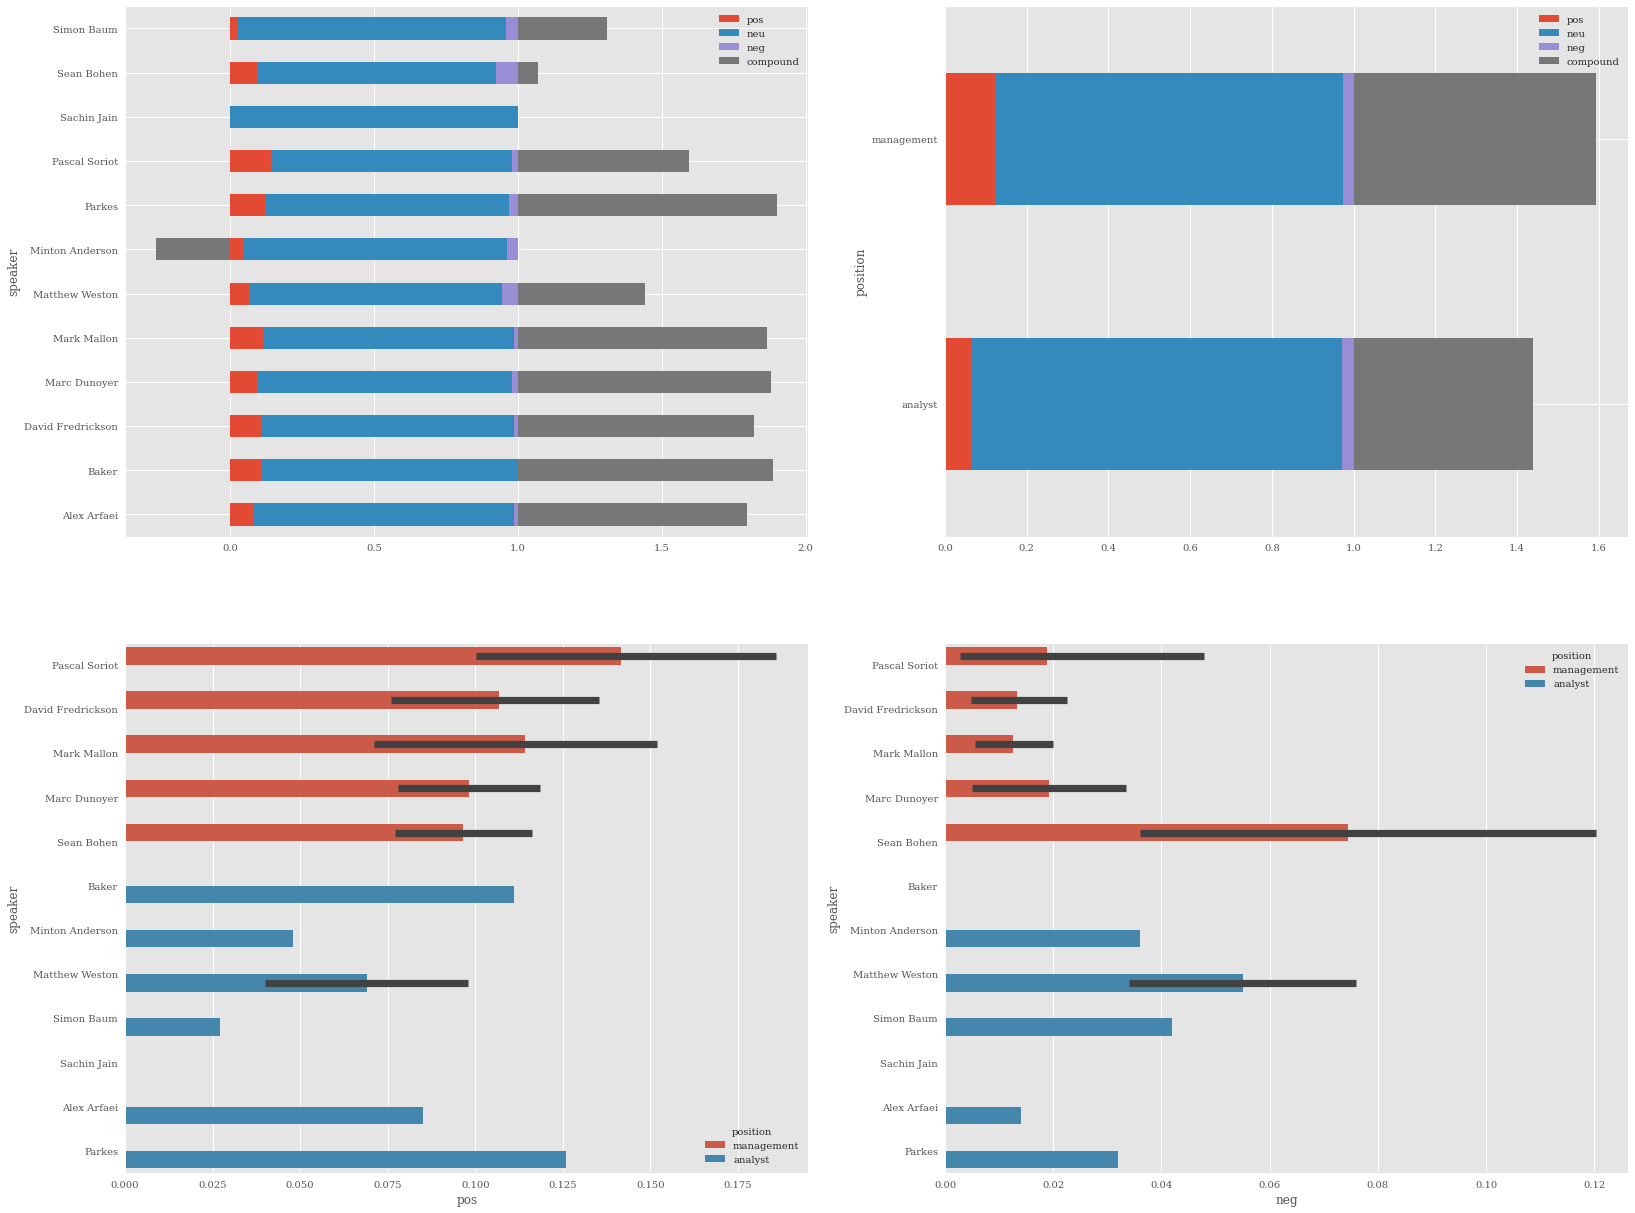

In [62]:
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
import seaborn as sns

def vader_sentiment_graph(data):
    df = vader_sentiment_score(data)
    
    plt.style.context('ggplot')
    mpl.rcParams['font.family'] = 'serif'
    fig, ax = plt.subplots(2,2, figsize=(24,20))

    speaker = df.groupby(['speaker'])[['pos', 'neu', 'neg', 'compound']].mean()
    speaker.plot(kind='barh', stacked=True, ax=ax[0][0])
    print('Management: {}'.format(set(df[df['position']=='management']['speaker'])))

    position = df.groupby(['position'])[['pos', 'neu', 'neg', 'compound']].mean()
    position.plot(kind='barh', stacked=True, ax=ax[0][1])
    sns.barplot(y="speaker", x="pos", hue="position", data=df, ax=ax[1][0])
    sns.barplot(y="speaker", x="neg", hue="position", data=df, ax=ax[1][1])
    print("Average 'Compound Score': {0:.3f}".format(df['compound'].mean()))

    

vader_sentiment_graph(data)

Management: {'Geoﬀrey Drabble', 'Suzanne Wood'}
Average 'Compound Score': 0.863


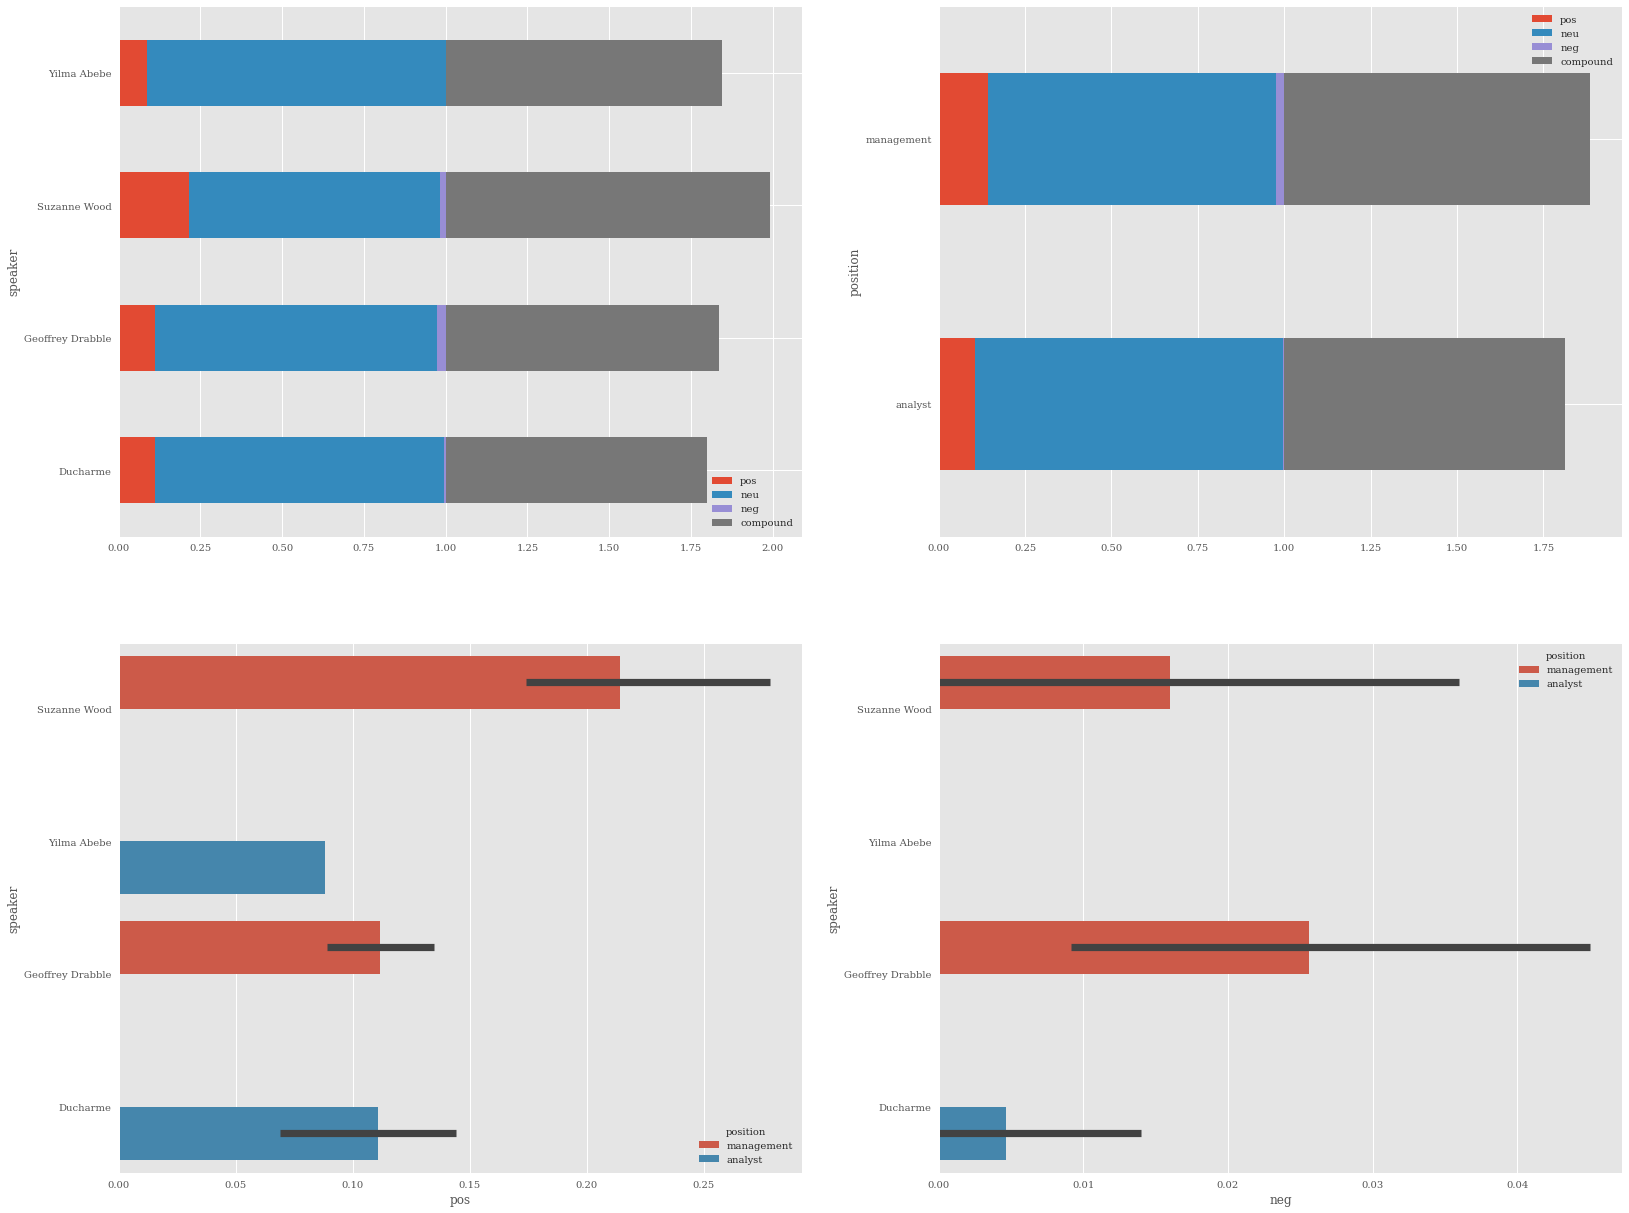

In [73]:
vader_sentiment_graph(data1)

Management: {'Mark Bristow', 'Patrick Shuttleworth', 'Lewis Coleman'}
Average 'Compound Score': 0.328


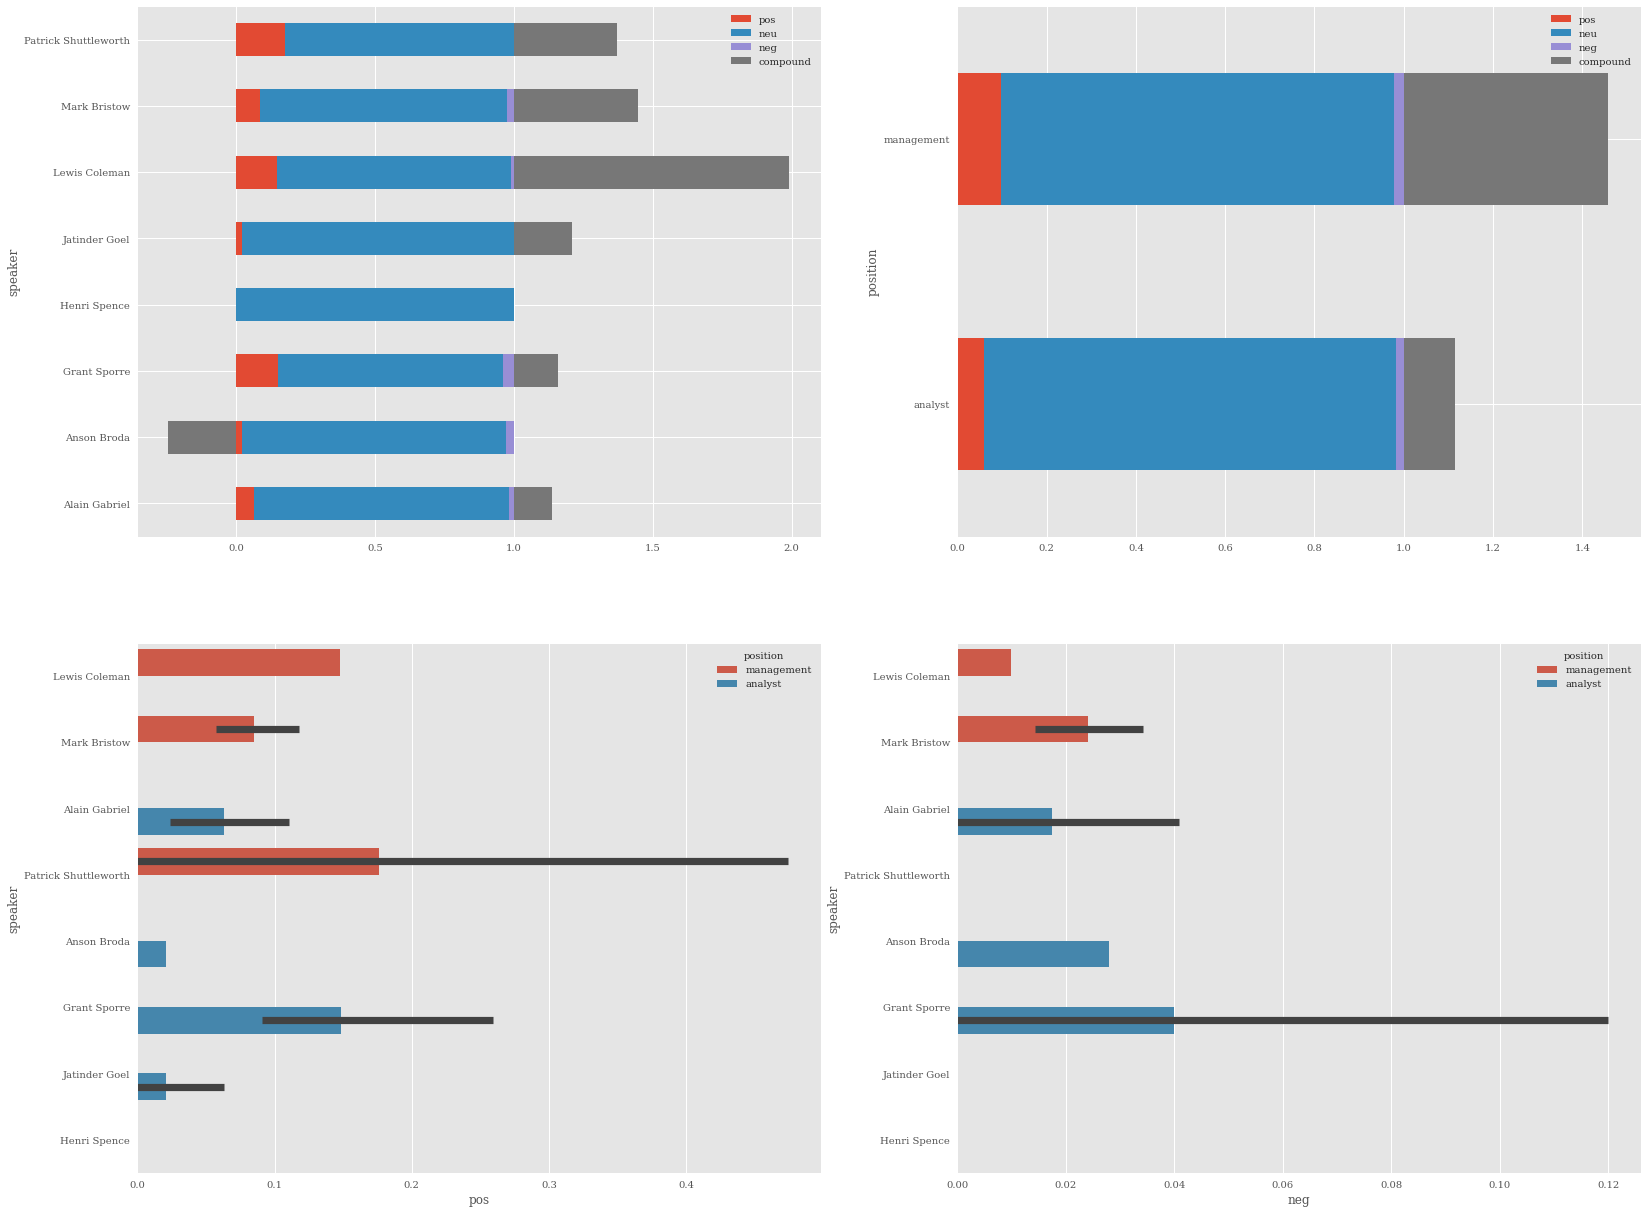

In [74]:
vader_sentiment_graph(data12)